In [2]:
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI
%matplotlib inline

In [3]:
import MDAnalysis as mda

In [4]:
from MDAnalysis.analysis import align

In [5]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1','4NPQ_F238LI233T_pH46_md1',
               '4NPQ_F238L_pH46_md1','4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [6]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH46_md1','4NPQ_pH70_md5','4HFI_pH46_md1',]

In [84]:
def create_hydration_profile(md_data = None):
    def append_hydration_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cyzone 7 12 -12 protein and resid 235) and name OW",updating = True)
        hydration_data = []
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
        hydration_frame.append(hydration_data)
    hydration_frame = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    return hydration_frame

In [85]:
hydration_data = create_hydration_profile()

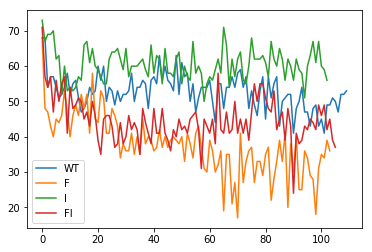

In [79]:
plt.plot(hydration_data[0],label='WT')
plt.plot(hydration_data[1],label='F')
plt.plot(hydration_data[2],label='I')
plt.plot(hydration_data[3],label='FI')
plt.legend()

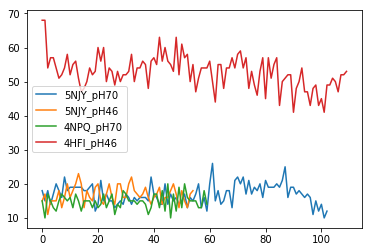

In [86]:
plt.plot(hydration_data[0],label='5NJY_pH70')
plt.plot(hydration_data[1],label='5NJY_pH46')
plt.plot(hydration_data[2],label='4NPQ_pH70')
plt.plot(hydration_data[3],label='4HFI_pH46')
plt.legend()

In [32]:
traj_note = '5NJY_pH70_md1'
location = '/media/scottzhuang/data/MD/'
skip=10
top_location = traj_note + '/' + traj_note + ".system.gro"
traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
traj = mda.Universe(location + top_location,location + traj_location)
hydration = traj.select_atoms("(cylayer 7 20 10 -10 resid 235) and name OW and (around 5 resid 306)",updating = True)

In [49]:
traj_note = '5NJY_pH70_md1'
location = '/media/scottzhuang/data/MD/'
skip=10
top_location = traj_note + '/' + traj_note + ".system.gro"
traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
traj = mda.Universe(location + top_location,location + traj_location)
hydration = traj.select_atoms("(around 15 resid 304)",updating = True)

In [50]:
hydration

<AtomGroup with 7008 atoms, with selection '(around 15 resid 304)' on the entire Universe.>

In [51]:
traj.trajectory[0]

< Timestep 0 with unit cell dimensions [ 107.4250946   107.4250946   152.39041138   90.           90.           90.        ] >

In [52]:
hydration.write('hydration_m4_5.pdb')

In [56]:
def create_hydration_profile_8(md_data = None):
    def append_hydration_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cylayer 7 20 8 -8 resid 235) and name OW and (around 15 resid 304)",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
            print(hydration.n_atoms)
    hydration_data = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    #md_data['hydration_data_m123'] = hydration_data

In [73]:
print(np.arange(235,1600,311))

[ 235  546  857 1168 1479]


In [44]:
traj.residues[1999]

<Residue HOH, 11000>

In [59]:
traj.select_atoms('type H')

<AtomGroup with 89742 atoms>

In [57]:
traj_note = '5NJY_pH70_md1'
location = '/media/scottzhuang/data/MD/md_ensemble/'
top_location = traj_note + '/' + traj_note + ".system3.pdb"
traj_location = traj_note + '/' + traj_note + ".skip10.system.xtc"
traj = mda.Universe(location + top_location,location + traj_location)
traj.select_atoms('name OW')

<AtomGroup with 0 atoms>

In [63]:
traj_note = '4HFI_F238L_pH46_md1'
location = '/media/scottzhuang/data/MD/md_ensemble/'
top_location = traj_note + '/' + traj_note + ".system3.pdb"
traj_location = traj_note + '/' + traj_note + ".skip10.system.xtc"
traj = mda.Universe(location + top_location,location + traj_location)
hydration = traj.select_atoms("(((cyzone 10 10 -10 resnum 230) and (cyzone 10 10 -10 resnum 541)) or ((cyzone 10 10 -10 resnum 541) and (cyzone 10 10 -10 resnum 852)) or ((cyzone 10 10 -10 resnum 852) and (cyzone 10 10 -10 resnum 1163)) or((cyzone 10 10 -10 resnum 1163) and (cyzone 10 10 -10 resnum 1474)) or((cyzone 10 10 -10 resnum 1474) and (cyzone 10 10 -10 resnum 230))) and (cylayer 7 20 8 -8 resid 235) and resname HOH and ((type O))",updating = True)

for i in range(0,traj.trajectory.n_frames):
    traj.trajectory[i]
    print(hydration.n_atoms)

31
22
23
21



KeyboardInterrupt



In [31]:
hydration

<AtomGroup with 0 atoms, with selection '(cyzone 10 8 -8 (resnum 230)) and name OW' on the entire Universe.>

In [98]:
traj_note = '4HFI_F238L_pH46_md1'
location = '/media/scottzhuang/data/MD/md_ensemble/'
top_location = traj_note + '/' + traj_note + ".system3.pdb"
traj_location = traj_note + '/' + traj_note + ".skip10.system.xtc"
traj = mda.Universe(location + top_location,location + traj_location)
#traj = traj.select_atoms("((((cyzone 10 10 -10 resnum 230) and (cyzone 10 10 -10 resnum 541)) or ((cyzone 10 10 -10 resnum 541) and (cyzone 10 10 -10 resnum 852)) or ((cyzone 10 10 -10 resnum 852) and (cyzone 10 10 -10 resnum 1163)) or ((cyzone 10 10 -10 resnum 1163) and (cyzone 10 10 -10 resnum 1474)) or ((cyzone 10 10 -10 resnum 1474) and (cyzone 10 10 -10 resnum 230)))) and (cylayer 7 20 -10 -30 protein)",updating = True)
traj = traj.select_atoms('cyzone 10 10 -10 resnum 230')

In [99]:
traj

<AtomGroup with 712 atoms>

In [100]:
traj.atoms.write("test.pdb")